## EDA

In [4]:
!ls 

catboost_info		   test_identity.csv.zip     train_transaction.csv.zip
EDA.ipynb		   test_transaction.csv      Untitled1.ipynb
LGBM_submission.csv	   test_transaction.csv.zip  Untitled.ipynb
sample_submission.csv	   train_identity.csv	     XGB_model_submission.csv
sample_submission.csv.zip  train_identity.csv.zip
test_identity.csv	   train_transaction.csv


In [5]:
!ls train*

train_identity.csv	train_transaction.csv
train_identity.csv.zip	train_transaction.csv.zip


#### train

**Import the needed libraries**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()

In [7]:
train_id_df = pd.read_csv('train_identity.csv')
print(train_id_df.shape)
train_id_df.head()

(144233, 41)


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [8]:
train_tr_df = pd.read_csv('train_transaction.csv')
print(train_tr_df.shape)
train_tr_df.head()

(590540, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Transaction Table **

- TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
- TransactionAMT: transaction payment amount in USD
- ProductCD: product code, the product for each transaction
- card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
- addr: address
- dist: distance
- P_ and (R__) emaildomain: purchaser and recipient email domain
- C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
- D1-D15: timedelta, such as days between previous transaction, etc.
- M1-M9: match, such as names on card and address, etc.
- Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

**Categorical Features:**

- ProductCD
- card1 - card6
- addr1, addr2
- Pemaildomain Remaildomain
- M1 - M9

**Identity Table **

- Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
- They're collected by Vesta’s fraud protection system and digital security partners (The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

**Categorical Features:**
- DeviceType
- DeviceInfo
- id12 - id38

**-----------------------------------**

**fill Nan values with zeros in both train_identity and train_transaction df**

In [9]:
train_id_df.fillna(int(0),inplace=True)
train_tr_df.fillna(int(0),inplace=True)

In [33]:
train_id_df['TransactionID'].nunique(),train_tr_df['TransactionID'].nunique()

(144233, 590540)

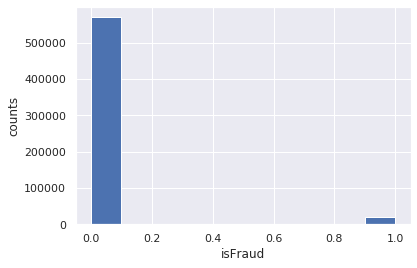

In [12]:
_ = plt.hist(train_tr_df.isFraud,bins=10)
_ = plt.xlabel('isFraud')
_ = plt.ylabel('counts')
plt.show()

In [13]:
train_tr_df['TransactionDT'].nunique()

573349

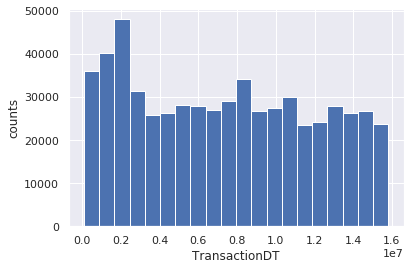

In [15]:
_ = plt.hist(train_tr_df.TransactionDT,bins=20)
_ = plt.xlabel('TransactionDT')
_ = plt.ylabel('counts')
plt.show()

In [16]:
train_tr_df['ProductCD'].nunique()

5

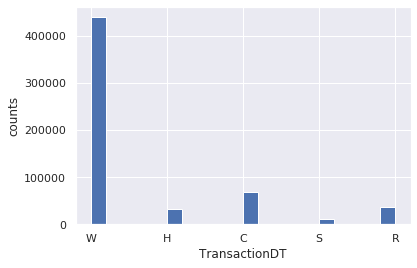

In [17]:
_ = plt.hist(train_tr_df.ProductCD,bins=20)
_ = plt.xlabel('TransactionDT')
_ = plt.ylabel('counts')
plt.show()

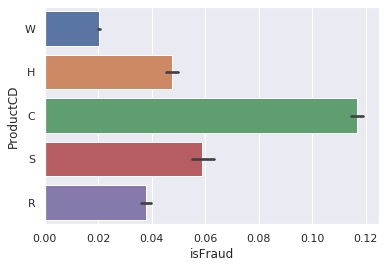

In [29]:
_ = sns.barplot(x ="isFraud",y="ProductCD",data=train_tr_df)
_ = plt.xlabel('isFraud')
_ = plt.ylabel('ProductCD')
plt.show()

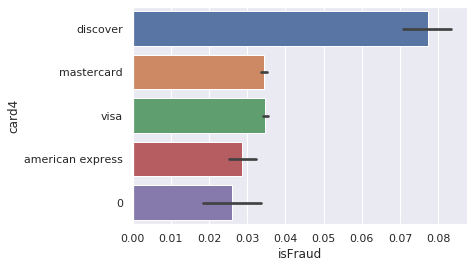

In [30]:
_ = sns.barplot(x ="isFraud",y="card4",data=train_tr_df)
_ = plt.xlabel('isFraud')
_ = plt.ylabel('card4')
plt.show()

**Test Data**

In [37]:
test_tr_df = pd.read_csv('test_transaction.csv')
print(test_tr_df.shape)
test_tr_df.head()

(506691, 393)


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
test_id_df = pd.read_csv('test_identity.csv')
print(test_id_df.shape)
test_id_df.head()

(141907, 41)


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


**Sample submission**

In [39]:
ss = pd.read_csv('sample_submission.csv')
print(ss.shape)
ss.head()

(506691, 2)


,TransactionID,isFraud
0,3663549,0.5
1,3663550,0.5
2,3663551,0.5
3,3663552,0.5
4,3663553,0.5
